# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-10-02 20:38:45.068233: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-02 20:38:45.068363: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-02 20:38:45.074617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-02 20:38:45.536198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1


2023-10-02 20:38:56.784470: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 20:38:56.883875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 20:38:56.883990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# TODO: Make all necessary imports.
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import json

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, data_dir='./tensorflow_datasets')

# Print the dataset info
print(dataset_info)

# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset['train'], dataset['validation'], dataset['test']

2023-10-02 20:39:03.125627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 20:39:03.125848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 20:39:03.125900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 20:39:06.650564: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 20:39:06.650621: I tensorflow/compile

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Explore the Dataset

In [4]:
# TODO: Get the number of examples in each set from the dataset info.
# Get the number of examples in each set
num_training_examples = dataset_info.splits['train'].num_examples
num_validation_examples = dataset_info.splits['validation'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

# Print the number of examples in each set
print('Number of training examples: ', num_training_examples)
print('Number of validation examples: ', num_validation_examples)
print('Number of test examples: ', num_test_examples)


# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes
print('Number of classes: ', num_classes)

Number of training examples:  1020
Number of validation examples:  1020
Number of test examples:  6149
Number of classes:  102


In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for example in training_set.take(3):
    image, label = example['image'], example['label']
    print('Image shape: ', image.shape)
    print('Label: ', label.numpy())

Image shape:  (500, 667, 3)
Label:  72
Image shape:  (500, 666, 3)
Label:  84
Image shape:  (670, 500, 3)
Label:  70


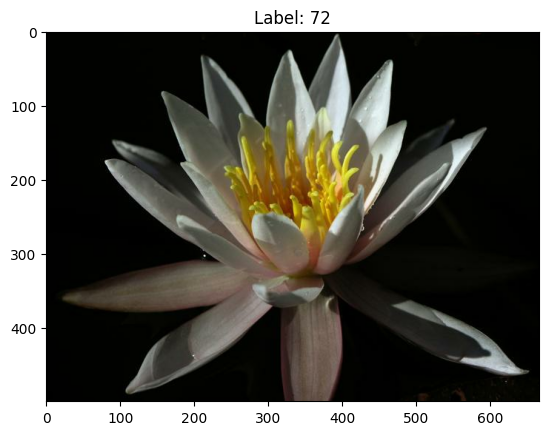

In [6]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label.

# Get one example from the training set
example = training_set.take(1)

# Get the image and label from the example
for e in example:
    image, label = e['image'], e['label']

# Plot the image and set the title to the corresponding label
plt.imshow(image)
plt.title('Label: ' + str(label.numpy()))
plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [7]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

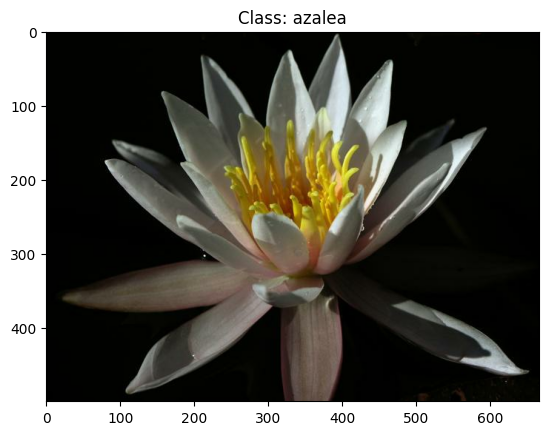

In [8]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for e in example:
    image, label = e['image'], e['label']

# Get the class name corresponding to the label
class_name = class_names[str(label.numpy().item())]

# Plot the image and set the title to the corresponding class name
plt.imshow(image)
plt.title('Class: ' + class_name)
plt.show()

## Create Pipeline

In [9]:
# TODO: Create a pipeline for each set.
def normalize(features):
    image = features['image']
    label = features['label']
    
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32)
    image /= 255
    
    return image, label

batch_size = 32

# Setting up the training batches
training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)

# Setting up the validation batches
validation_batches = validation_set.cache().batch(batch_size).map(normalize).prefetch(1)

# Setting up the testing batches
testing_batches = test_set.cache().batch(batch_size).map(normalize).prefetch(1)

In [10]:
# TODO: Create a pipeline for each set.
def normalize(features):
    image = features['image']
    label = features['label']
    
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32)
    image /= 255
    
    return image, label

batch_size = 32


training_batches = (training_set.cache()
                    .shuffle(num_training_examples//4)
                    .map(normalize)
                    .batch(batch_size)
                    .prefetch(1))

validation_batches = (validation_set.cache()
                      .map(normalize)
                      .batch(batch_size)
                      .prefetch(1))

testing_batches = (test_set.cache()
                   .map(normalize)
                   .batch(batch_size)
                   .prefetch(1))

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

#### TODO: Build and train your network.

In [11]:
# Check dimensions of image batches
for image_batch, label_batch in training_batches.take(1):
    print("Image batch shape: ", image_batch.shape)

Image batch shape:  (32, 224, 224, 3)


2023-10-02 20:39:45.708254: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [12]:
import tensorflow_hub as hub

# Load MobileNet model pre-trained on ImageNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(224, 224, 3), trainable=False)


In [23]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    feature_extractor,
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.4),
    
    layers.Dense(102, activation='softmax')  # 102 is the number of flower categories
])


In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Stop training when there is no improvement in the validation loss for 10 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
num_epochs = 100
history = model.fit(training_batches, 
                    epochs=num_epochs, 
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

# Get the epoch at which the training stopped due to early stopping
stopped_epoch = early_stopping.stopped_epoch
if stopped_epoch > 0:
    print("Training stopped at epoch {stopped_epoch}")
else:
    stopped_epoch = num_epochs - 1


Epoch 1/100


32/32 [==============================] - 29s 237ms/step - loss: 5.3991 - accuracy: 0.0137 - val_loss: 5.0130 - val_accuracy: 0.0167
Epoch 2/100
32/32 [==============================] - 6s 182ms/step - loss: 5.1395 - accuracy: 0.0157 - val_loss: 4.8975 - val_accuracy: 0.0588
Epoch 3/100
32/32 [==============================] - 6s 176ms/step - loss: 4.9630 - accuracy: 0.0324 - val_loss: 4.7826 - val_accuracy: 0.1490
Epoch 4/100
32/32 [==============================] - 5s 155ms/step - loss: 4.8314 - accuracy: 0.0412 - val_loss: 4.6197 - val_accuracy: 0.2304
Epoch 5/100
32/32 [==============================] - 5s 168ms/step - loss: 4.7131 - accuracy: 0.0618 - val_loss: 4.4382 - val_accuracy: 0.2578
Epoch 6/100
32/32 [==============================] - 6s 189ms/step - loss: 4.5532 - accuracy: 0.0804 - val_loss: 4.2272 - val_accuracy: 0.2971
Epoch 7/100
32/32 [==============================] - 6s 185ms/step - loss: 4.4126 - accuracy: 0.1078 - val_loss: 4.0365 - val_accuracy: 0.3284
Epoch 8/10

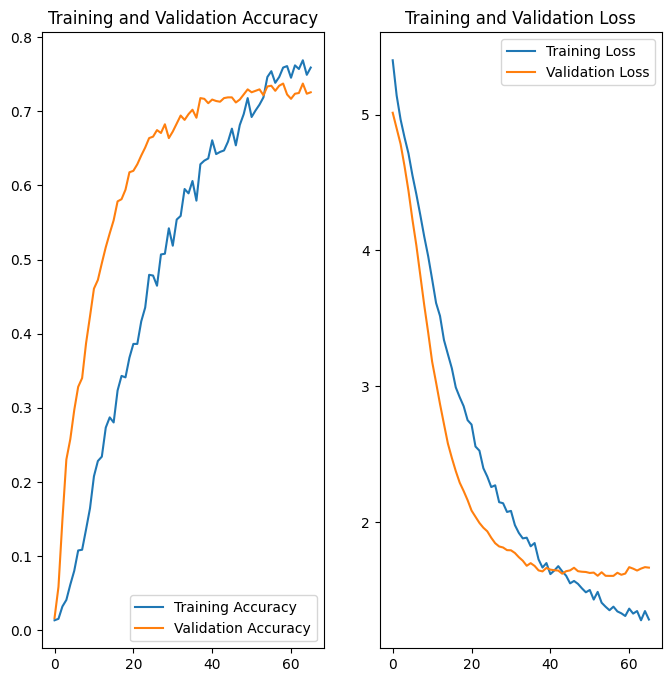

In [25]:
# Plots Training and Validation
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(stopped_epoch + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
loss, accuracy = model.evaluate(training_batches)
print('\nLoss on the training set: {:,.3f}'.format(loss))
print('Accuracy on the training set: {:.3%}'.format(accuracy))
print("..............................................")
loss, accuracy = model.evaluate(validation_batches)
print('\nLoss on the validation set: {:,.3f}'.format(loss))
print('Accuracy on the validation set: {:.3%}'.format(accuracy))


32/32 [==============================] - 5s 136ms/step - loss: 0.5646 - accuracy: 0.9990

Loss on the training set: 0.565
Accuracy on the training set: 99.902%
..............................................
32/32 [==============================] - 4s 132ms/step - loss: 1.6655 - accuracy: 0.7255

Loss on the validation set: 1.665
Accuracy on the validation set: 72.549%


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [27]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
# Define how many examples from the test set you want to evaluate on
subset_size = 1000  # Using a subset due to limited computational resources

# Using .take() method to create a subset of the testing data
testing_batches_subset = testing_batches.take(subset_size // batch_size)

# Evaluate the model on smaller batches and aggregate results
total_loss = 0
total_accuracy = 0
num_batches = 0

for images, labels in testing_batches_subset:
    batch_loss, batch_accuracy = model.evaluate(images, labels, verbose=0)
    total_loss += batch_loss
    total_accuracy += batch_accuracy
    num_batches += 1

# Average the results over all batches
average_test_loss = total_loss / num_batches
average_test_accuracy = total_accuracy / num_batches

# Print the results
print('\nAverage loss on the subset of testing set: {:,.3f}'.format(average_test_loss))
print('Average accuracy on the subset of testing set: {:.3%}'.format(average_test_accuracy))


2023-10-02 21:07:19.666433: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.



Average loss on the subset of testing set: 1.917
Average accuracy on the subset of testing set: 67.540%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [28]:
# TODO: Save your trained model as a Keras model.
model.save('image_classifier_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Keras Model

Load the Keras model you saved above.

In [30]:
# TODO: Load the Keras model
image_classifier_model = tf.keras.models.load_model(
    'image_classifier_model.h5', 
    custom_objects={'KerasLayer': hub.KerasLayer}
)


In [32]:
# Summary
image_classifier_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 batch_normalization_8 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 512)               655872    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 256)              

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [33]:
# TODO: Create the process_image function
from PIL import Image

def process_image(image_np):
    """
    Pre-processes the input image to be fed to the model.

    Args:
    - image_np (numpy.ndarray): Input image in the form of a numpy array.

    Returns:
    - numpy.ndarray: Processed image in the form of a numpy array with shape (224, 224, 3).
    """

    # Convert the numpy array image to a TensorFlow Tensor
    image_tensor = tf.convert_to_tensor(image_np)

    # Resize the image to the desired size
    image_resized = tf.image.resize(image_tensor, [224, 224])

    # Normalize the pixel values to [0, 1]
    image_normalized = image_resized / 255.0

    # Convert the TensorFlow Tensor back to a numpy array
    return image_normalized.numpy()



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

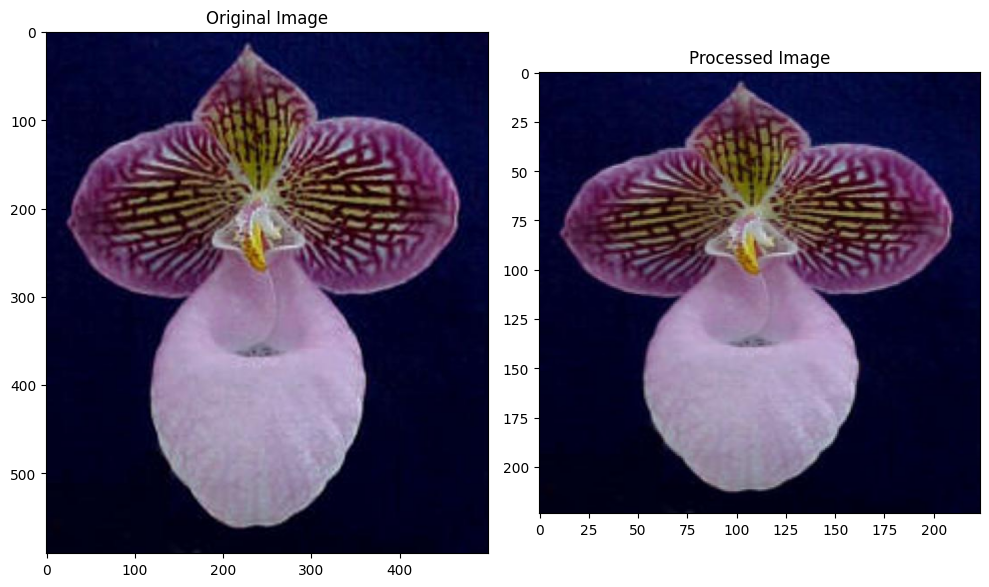

In [34]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [35]:
# TODO: Create the predict function
def predict(image_path, model, top_k):
    """
    Predict the class of an image using a trained model.

    Args:
    - image_path (str): Path to the image.
    - model (tensorflow.keras.Model): Trained model.
    - top_k (int): Number of top predictions to return.

    Returns:
    - list: Top K probabilities.
    - list: Corresponding class labels for the top K probabilities.
    """

    # Load the image using PIL
    image = Image.open(image_path)

    # Convert the PIL image to a numpy array
    image_np = np.asarray(image)

    # Preprocess the image using the process_image function
    processed_image = process_image(image_np)

    # Add an extra dimension for batch size
    batched_image = np.expand_dims(processed_image, axis=0)

    # Make predictions using the model
    predictions = model.predict(batched_image)

    # Extract the top K probabilities and their indices
    top_k_values, top_k_indices = tf.math.top_k(predictions, k=top_k)

    # Convert the top K probabilities and their indices to lists
    top_k_probs = top_k_values.numpy().tolist()[0]
    top_k_classes = top_k_indices.numpy().tolist()[0]

    return top_k_probs, [str(i) for i in top_k_classes]



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [36]:
# TODO: Plot the input image along with the top 5 classes
import matplotlib.pyplot as plt

def plot_predictions(image_path, model, class_names, top_k=5):
    """
    Plot an image and its top K class probabilities side by side.

    Args:
    - image_path (str): Path to the image.
    - model (tensorflow.keras.Model): Trained model.
    - class_names (dict): Mapping of class indices to class names.
    - top_k (int): Number of top predictions to display.
    """

    # Use PIL to open and display image
    image = Image.open(image_path)

    # Use the predict function to get the top K probabilities and classes
    probs, classes = predict(image_path, model, top_k)

    # Convert class indices to actual flower names
    labels = [class_names[str(c)] for c in classes]

    # Create a figure with two subplots: one for the image, one for the bar graph
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2)

    # Display the image on the left subplot
    ax1.imshow(image)
    ax1.axis('off')

    # Display the bar graph on the right subplot
    ax2.barh(labels, probs)
    ax2.set_xlabel('Probability')
    ax2.set_title('Class Probabilities')
    ax2.invert_yaxis()  # Highest probability at the top

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 3s 3s/step


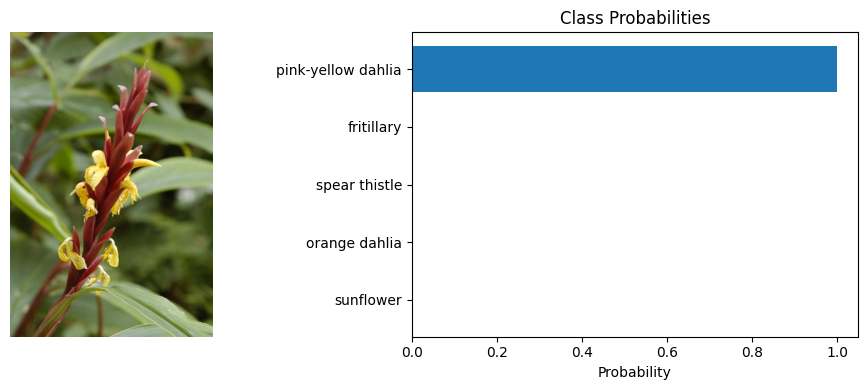

In [37]:
# Test the function with cautleya_spicata
image_path = "./test_images/cautleya_spicata.jpg"
plot_predictions(image_path, model, class_names)

1/1 [==============================] - 0s 67ms/step


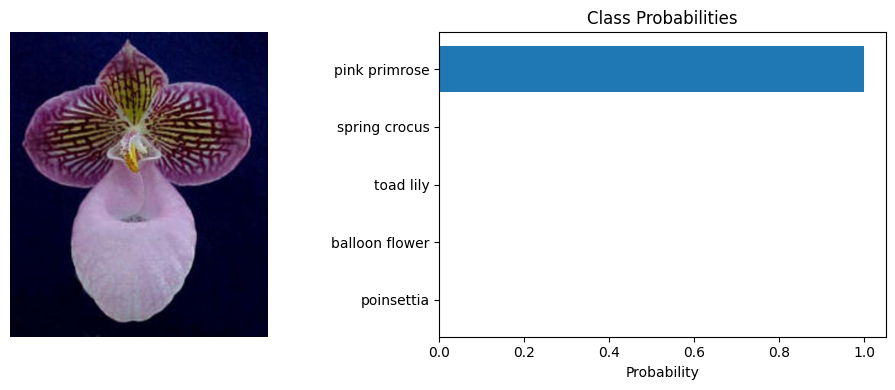

In [38]:
# Test the function with hard-leaved_pocket_orchid
image_path = "./test_images/hard-leaved_pocket_orchid.jpg"
plot_predictions(image_path, model, class_names)

1/1 [==============================] - 0s 84ms/step


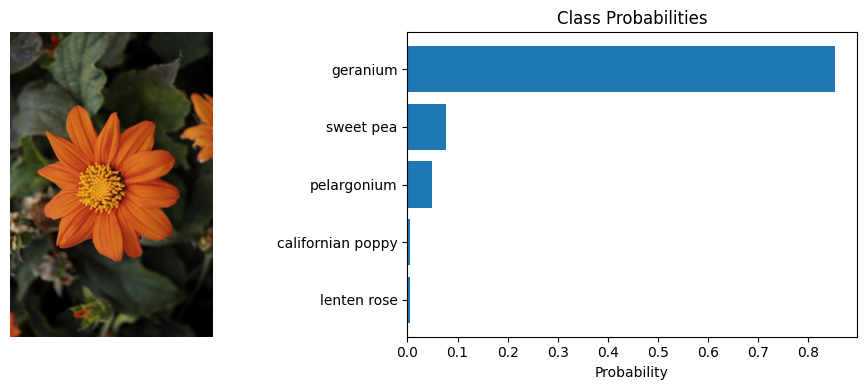

In [39]:
# Test the function with orange_dahlia
image_path = "./test_images/orange_dahlia.jpg"
plot_predictions(image_path, model, class_names)

1/1 [==============================] - 0s 49ms/step


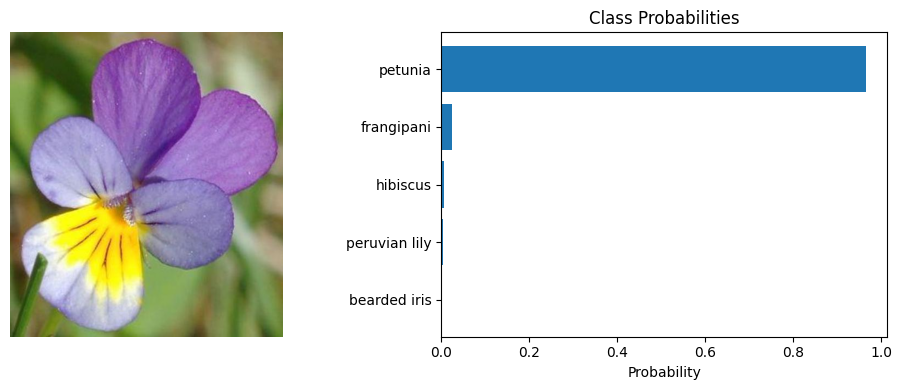

In [40]:
# Test the function with wild_pansy
image_path = "./test_images/wild_pansy.jpg"
plot_predictions(image_path, model, class_names)